In [2]:
import numpy as np
from boxvectors import directions as directions
import Initial_Parameters as ip
from md import System
from md import md
from distribution import maxwellboltzmann
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.special import erfc
from scipy.constants import epsilon_0
%matplotlib inline

In [3]:
Symbols = ip.Symbols
Coefficients = ip.Coefficients
Charges = ip.Charges
N = ip.N*np.sum(Coefficients)
L = ip.L
T = ip.T
dt = ip.dt
p_rea = ip.p_rea
std = ip.std
n_boxes_short_range = ip.n_boxes_short_range
p_error = ip.p_error
Sys= System(Symbols, Coefficients, Charges, N/2)
Labels = Sys.get_Labels()
Sigma, Epsilon = Sys.get_LJ_parameter()
r_cut_coulomb = ip.r_cut_coulomb
r_cut_LJ = ip.r_cut_LJ
r_switch = ip.r_switch
switch_parameter = ip.switch_parameter
m = Labels[:,0]

In [4]:
def get_random_starting_Positions(N,L):
    Positions = np.zeros((N,3))
    Positions[:,0] = np.linspace(0.1/N,L[0],N, endpoint = False)
    Positions[:,1] = np.linspace(0.1/N,L[1],N, endpoint = False)
    Positions[:,2] = np.linspace(0.1/N,L[2],N, endpoint = False)
    np.random.shuffle(Positions[:,0])
    np.random.shuffle(Positions[:,1])
    np.random.shuffle(Positions[:,2])
    return Positions
Positions = get_random_starting_Positions(N,L)
Velocities = maxwellboltzmann().sample_distribution(N,m,T)
Forces = np.zeros((N,3))
R = np.linalg.norm(Positions,axis=1)

In [5]:
MD = md(
    Positions, 
    R, 
    Labels, 
    Velocities,
    Forces, 
    L, 
    T, 
    Sigma, 
    Epsilon, 
    switch_parameter,
    r_switch,
    r_cut_LJ,
    dt, 
    std,
    n_boxes_short_range,
    p_rea,
    p_error)

In [6]:
MD.forces = MD.get_forces()

In [7]:
print MD.get_energy()
print MD.get_potential()
print MD.forces

-1.79081138529e-24
[ -3.33309316e-08   2.08725275e-08   3.38051474e-08   5.94450247e-08
  -1.72227544e-08   2.42102347e-08   1.00469853e-07  -2.49687584e-08
  -1.30233498e-08   1.25304885e-08  -6.59339051e-08  -5.74772666e-08
  -5.98161815e-08  -3.13917515e-08  -1.31530648e-08  -4.71138188e-08
  -5.63718068e-08  -3.68724424e-08  -3.80408553e-08  -5.48196317e-08]
[[  4.40189654e-25  -3.55624106e-25  -6.81264677e-25]
 [ -1.92856140e-26   3.78865757e-25  -1.27544917e-25]
 [ -2.54580009e-25   1.66274851e-25  -3.04851263e-25]
 [ -2.47753400e-25  -3.30648887e-25   1.02818474e-25]
 [ -2.22831971e-26   3.28117931e-25   4.26364183e-25]
 [  5.02816557e-25   3.18126503e-25   3.12068885e-25]
 [  2.99094773e-25  -1.04779339e-25  -2.72593205e-25]
 [ -5.05777932e-25  -4.50050659e-25  -1.75306887e-25]
 [ -8.20557920e-26   2.97135040e-25   2.81324037e-25]
 [  4.73627246e-25  -1.83722018e-25   3.27660677e-25]
 [  2.70546685e-25   4.96204860e-25  -8.18424006e-26]
 [  6.41638212e-26   3.84458048e-25   6.0

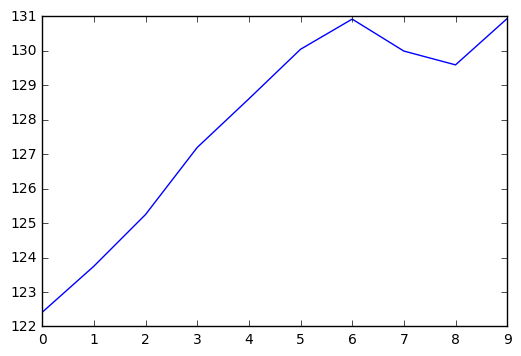

In [9]:
Temperature = np.zeros(10)
for i in np.arange(10):
    Positions_New, Velocities_New, Forces_New = MD.propagte_system()
    MD.positions = Positions_New
    MD.velocities = Velocities_New
    MD.forces = Forces_New
    MD.neighbours_LJ  = MD.get_neighbourlist_LJ()[0]
    Temperature[i] = MD.get_Temperature()
plt.plot(Temperature)

In [12]:
MD.neighbours = 0
MD.neighbours

0